# 1. Complementation

## 1.1.1 不同方法比较

In [4]:
from zzd.utils.assess import multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


#(1)读取数据
# 3种方法，4个测试集，每个测试集重复10次，共120个数据
AraPathogen2_c1, AraPathogen2_c2h, AraPathogen2_c2p, AraPathogen2_c3 = [],[],[],[] 
AraPathogen1_c1, AraPathogen1_c2h, AraPathogen1_c2p, AraPathogen1_c3 = [],[],[],[] 
DSCRIPT_c1,      DSCRIPT_c2h,      DSCRIPT_c2p,      DSCRIPT_c3      = [],[],[],[] 


for i in range(10):
    AraPathogen2_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    AraPathogen2_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    AraPathogen2_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])
    AraPathogen2_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    AraPathogen1_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_ac_ct_dpc_PSP_AraNetProperty/c1_test_pred_{i}.txt")[:,-2:])
    AraPathogen1_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_ac_ct_dpc_PSP_AraNetProperty/c2h_pred_{i}.txt")[:,-2:])
    AraPathogen1_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_ac_ct_dpc_PSP_AraNetProperty/c2p_pred_{i}.txt")[:,-2:])
    AraPathogen1_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_ac_ct_dpc_PSP_AraNetProperty/c3_pred_{i}.txt")[:,-2:])
    
    DSCRIPT_c1.append(
        np.genfromtxt(f"./preds/D-script/C1_fold{i}_test.predictions.tsv")[:,-2:])
    DSCRIPT_c2h .append(
        np.genfromtxt(f"./preds/D-script/C2h_fold{i}.predictions.tsv")[:,-2:])
    DSCRIPT_c2p .append(
        np.genfromtxt(f"./preds/D-script/C2p_fold{i}.predictions.tsv")[:,-2:])
    DSCRIPT_c3 .append(
        np.genfromtxt(f"./preds/D-script/C3_fold{i}.predictions.tsv")[:,-2:])
    
data = [
    [AraPathogen2_c1  ,    AraPathogen2_c2h ,    AraPathogen2_c2p ,    AraPathogen2_c3 ] ,
    [AraPathogen1_c1  ,    AraPathogen1_c2h ,    AraPathogen1_c2p ,    AraPathogen1_c3 ],  
    [DSCRIPT_c1,           DSCRIPT_c2h ,         DSCRIPT_c2p ,         DSCRIPT_c3] ]


#(2)统计AUPRC值
auprc_3_4_10_12 = np.zeros((3,4,10,12))  #3种方法 4个测试集 10次重复 12种指标
auprc_3_4_10 = np.zeros((3,4,10))   #3种方法 4个测试集 10次重复 1种指标
auprc_3_4_avg = np.zeros((3,4,1))    #3种方法 4个测试集 10次重复平均值 1种指标

for i_m in range(3): #10种方法    
    for i_t in range(4):#4个测试集
        tmp = [multi_scores(data[i_m][i_t][_][:,0], data[i_m][i_t][_][:,1], show=False)
               for _ in range(10)]
        tmp = np.array(tmp) #(10,12)
        
        auprc_3_4_10_12[i_m,i_t] = tmp 

auprc_3_4_10 = auprc_3_4_10_12[:,:,:,-1]
auprc_3_4_avg = auprc_3_4_10.mean(2)


np.set_printoptions(suppress=True)

# "\t".join([str(f"{a:.1f}±{b:.1f}") for a,b in zip(single_sc_mean[:4],single_sc_std[:4])]) + "\t" +

keep_index = np.array([False,False,False,False,  True,True,True,  False,False,True,False,True])
print (np.array("TP	TN	FP	FN	PPV	TPR	TNR	Acc	mcc	f1	AUROC	AUPRC".split("\t"))[keep_index])
for t in range(4):
    for m in range(3):
        tmp = auprc_3_4_10_12[m,t]
        single_sc_mean = tmp.mean(0)
        single_sc_std = tmp.std(0)
        
        print(
              "\t".join([str(f"{a:.3f}±{b:.3f}") for a,b in zip(single_sc_mean[keep_index],single_sc_std[keep_index])]).replace("±0","±")
        )

['PPV' 'TPR' 'TNR' 'f1' 'AUPRC']
0.921±.041	0.680±.041	0.994±.004	0.781±.024	0.881±.015
0.930±.032	0.451±.070	0.996±.002	0.603±.061	0.781±.046
0.616±.283	0.155±.132	0.994±.004	0.233±.176	0.433±.176
0.881±.023	0.403±.040	0.995±.001	0.552±.036	0.763±.025
0.926±.037	0.269±.049	0.998±.001	0.414±.059	0.735±.028
0.427±.272	0.054±.048	0.994±.005	0.093±.080	0.272±.115
0.798±.045	0.362±.038	0.991±.003	0.497±.038	0.645±.039
0.875±.056	0.174±.043	0.997±.001	0.288±.060	0.546±.036
0.434±.250	0.068±.065	0.994±.005	0.111±.103	0.272±.103
0.760±.072	0.078±.036	0.997±.001	0.139±.058	0.530±.054
0.700±.458	0.016±.013	1.000±.000	0.031±.025	0.434±.092
0.195±.189	0.019±.030	0.995±.005	0.033±.049	0.165±.053


In [5]:
# np.set_printoptions(suppress=True)

# print("TP	TN	FP	FN	PPV	TPR	TNR	Acc	mcc	f1	AUROC	AUPRC	AP")
# for m in range(3):
#     print(f'm_{m}')
#     for t in range(4):
#         tmp = auprc_3_4_10_scs[m,t]
#         single_sc_mean = tmp.mean(0)
#         single_sc_std = tmp.std(0)
#         # print("\t".join([str(f"{_:.1f}") for _ in single_sc_mean[:4]]) + "\t" +
#         #       "\t".join([str(f"{_:.3f}") for _ in single_sc_mean[4:]]))
        
#         print("\t".join([str(f"{a:.1f}±{b:.1f}") for a,b in zip(single_sc_mean[:4],single_sc_std[:4])]) + "\t" +
#               "\t".join([str(f"{a:.3f}±{b:.3f}") for a,b in zip(single_sc_mean[4:],single_sc_std[4:])]))
            
#         # break
        
#     # break

/tmp/ipykernel_6806/40520430.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','regular test', '','',


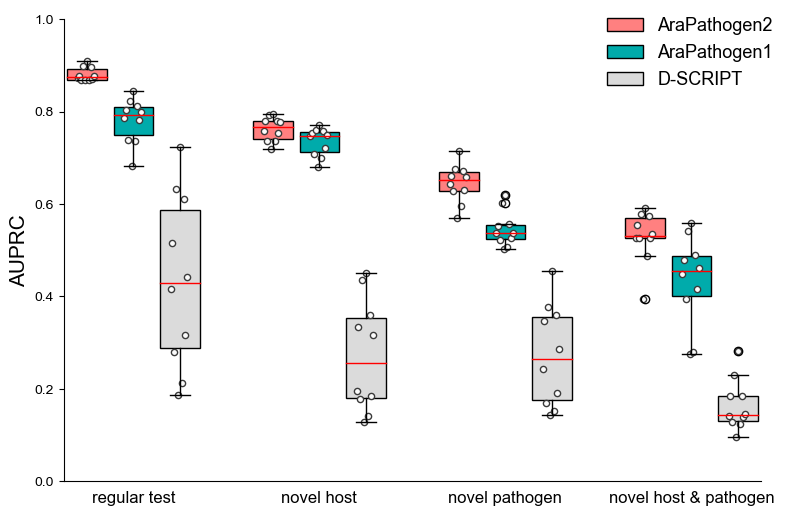

In [6]:
#(3)统计图
#数据
labels = ['AraPathogen2.0', 'AraPathogen1.0', 'D-SCRIPT']
colors = ["#FF8080",        '#00ABAB',         "#DBDBDB"] #colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']

def middle_scatter(x):
    x = np.array(x)
    x.sort()
    return x[np.array([4,6,2,8,0,9,1,7,3,5])]

#格式
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# ax.set_xticks()
ax.tick_params(bottom=False,top=False,left=True,right=False)
ax.set_xticklabels(('','regular test', '','',
                    'novel host','',
                    '','novel pathogen','',
                    '','novel host & pathogen',''),fontdict={"fontsize":12}, rotation=0,ha='center')
ax.set_ylim(0,1)

ax.set_title("",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})

#绘图
bps=[]
for idx_t in range(4):#每个测试集
    for idx_m in range(3):#每种方法
        x = idx_t*4+idx_m
        y = auprc_3_4_10[idx_m][idx_t]
        # labels = [labels[idx_m],] if idx_m==0 else ['']
        #ax.scatter()
        
        bplot = ax.boxplot(y,positions=range(x,x+1),
                           widths=0.85,
                           patch_artist=True,
                           labels=[labels[idx_m]],
                           medianprops=dict(color='red'))
        bps.append(bplot)
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[idx_m])     
            patch.set_zorder(1)
            
        # ax.scatter(x+np.arange(10)*0.02-0.1, middle_scatter(y), s=5, color="#000000",)
        ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(y), s=20, color="#FBFBFB",edgecolors="#3B3B3B")

# plt.legend(fontsize=15,shadow=False,framealpha=0,bbox_to_anchor=(0.92, 1.04, ))
plt.legend([bps[0]["boxes"][0],bps[1]["boxes"][0],bps[2]["boxes"][0]],
           ['AraPathogen2', 'AraPathogen1', 'D-SCRIPT'],
           shadow=False,
           framealpha=0,
           bbox_to_anchor=(1.04, 1.04, ),
           # bbox_to_anchor=None,
           fontsize=13)


In [21]:
# scs = []
# for i in range(13):
#     sc = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1],threshold=0.1)  
#               for _ in range(10) ],0)
#     scs.append(sc)
    
# print(f"TP\tTN\tFP\tFN\tprecision\trecall\tspecificity\tAcc\tmcc\tf1\tAUROC\tAUPRC\tAP")
# print(f"TP\tTN\tFP\tFN\tPPV\tTPR\tTNR\tAcc\tmcc\tf1\tAUROC\tAUPRC\tAP")
# fmat =  [1, 1,  1,  1,  3,  3,  3,  3,  3,  3,  3, 3,3]
# for i in [0,4,8,  1,5,9,  2,6,10,  3,7,11,12,]:
#     sc = scs[i]
#     line = '\t'.join([ f'{a:.{_}f}' for (_,a) in zip(fmat,sc)])
#     print(line)


/tmp/ipykernel_6806/3551964787.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','                   regular test',
/tmp/ipykernel_6806/3551964787.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})


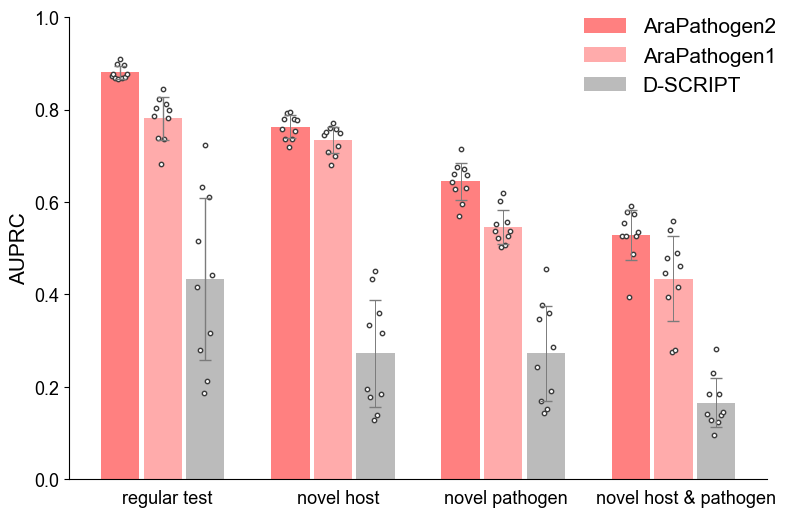

In [8]:
#(3)统计图
#数据
labels = ["AraPathogen2", "AraPathogen1",  "D-SCRIPT"]
colors = ["#FF8080",'#FFABAB',  "#BBBBBB","#DBDBDB",]#colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']
colors = ["#FF8080",'#FFABAB',
          "#BBBBBB","#DBDBDB",
          '#00DBDB','#00ABAB',"#FFABAB",'#B0DBDB',
          ]
def midle_high_sort(x):
    x = np.array(sorted(x))
    x = np.hstack((x[np.arange(0,len(x),2)],np.flipud(x[np.arange(1,len(x),2)])))
    return x

def middle_scatter(x):
    x = np.array(x)
    x.sort()
    return x[np.array([4,6,2,8,0,9,1,7,3,5])]

#格式
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# ax.set_xticks()
ax.tick_params(bottom=False,top=False,left=True,right=False)
ax.set_xticklabels(('','                   regular test', 
                    '','                   novel host',
                    '','                  novel pathogen',
                    '','                      novel host & pathogen',''),fontdict={"fontsize":13}, rotation=0)
ax.set_ylim(0,1)
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})

ax.set_title("",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})

#绘图
bps=[]
for idx_t in range(4):#每个测试集
    for idx_m in range(3):#每种方法
        x = idx_t*4+idx_m
        y = auprc_3_4_avg[idx_m][idx_t]
        if idx_t==0:
            ax.bar(x, y, width=0.9,label=labels[idx_m],color=colors[idx_m],ecolor='#6B6B6B') # 条形图 or barplot
             
            ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(auprc_3_4_10[idx_m][idx_t]), s=10, color="#FBFBFB",edgecolors="#3B3B3B",alpha=1.)    
            ax.errorbar(x, y, yerr=np.std(auprc_3_4_10[idx_m][idx_t]),fmt='',color='#7B7B7B',elinewidth=1,capsize=4,ls="",alpha=1.) # 标准差 or std line

        else:
            ax.bar(x, y, width=0.9,color=colors[idx_m],ecolor='#6B6B6B') # 条形图 or barplot
             
            ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(auprc_3_4_10[idx_m][idx_t]), s=10, color="#FBFBFB",edgecolors="#3B3B3B",alpha=1.)   
            ax.errorbar(x, y, yerr=np.std(auprc_3_4_10[idx_m][idx_t]),fmt='',color='#7B7B7B',elinewidth=.7,capsize=4,ls="",alpha=1.) # 标准差 or std line

plt.legend(fontsize=15,shadow=False,framealpha=0,bbox_to_anchor=(1.04, 1.04, ))
plt.savefig('./pics/method-compare.svg', dpi=600,bbox_inches = 'tight',format="svg")